# Setup

In [2]:
import sys
sys.path.insert(0, '..')

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from processing_utils.feature_data_from_mat import load_subject_high_gamma_phoneme

In [4]:
import os

sig = True
zscore = False
cluster = False
# data_dir = os.path.expanduser('~') + 'data'
data_dir = '../data/'

In [5]:
phon_labels = ['a', 'ae', 'i', 'u', 'b', 'p', 'v', 'g', 'k']
artic_labels = ['low', 'high', 'labial', 'dorsal']
phon_to_artic_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4}

In [6]:
def phon_to_artic(phon_idx, phon_to_artic_conv):
    return phon_to_artic_conv[phon_idx]

def phon_to_artic_seq(phon_seq, phon_to_artic_conv):
    flat_seq = phon_seq.flatten()
    artic_conv = np.array([phon_to_artic(phon_idx, phon_to_artic_conv) for phon_idx in flat_seq])
    return np.reshape(artic_conv, phon_seq.shape)

# Load in phoneme onset data across patients and save to pkl file

In [8]:
import alignment.alignment_utils as utils

In [19]:
pts = ['S14', 'S26', 'S23', 'S33', 'S22']
pt_decoding_data = {}
for pt in pts:
    hg_data = load_subject_high_gamma_phoneme(pt, phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir=data_dir)
    hg_collapsed = np.concatenate((hg_data['X1'], hg_data['X2'], hg_data['X3']), axis=0)
    phon_labels_collapsed = np.concatenate((hg_data['y1'], hg_data['y2'], hg_data['y3']), axis=0)
    artic_labels_collapsed = phon_to_artic_seq(phon_labels_collapsed, phon_to_artic_dict)

    hg_data['X_collapsed'] = hg_collapsed
    hg_data['y_phon_collapsed'] = phon_labels_collapsed
    hg_data['y_artic_collapsed'] = artic_labels_collapsed
    pre_pts = [p for p in pts if p != pt]

    pt_decoding_data[pt] = hg_data | {'pre_pts': pre_pts}

['S26', 'S23', 'S33', 'S22']
['S14', 'S23', 'S33', 'S22']
['S14', 'S26', 'S33', 'S22']
['S14', 'S26', 'S23', 'S22']
['S14', 'S26', 'S23', 'S33']


In [20]:
utils.save_pkl(pt_decoding_data, '../data/pt_decoding_data_S22.pkl')

# Check data in pkl file

S14: 
[(144, 200, 111), (144,), (144, 3)]
[(148, 200, 111), (151, 200, 63), (46, 200, 149), (151, 200, 74)]


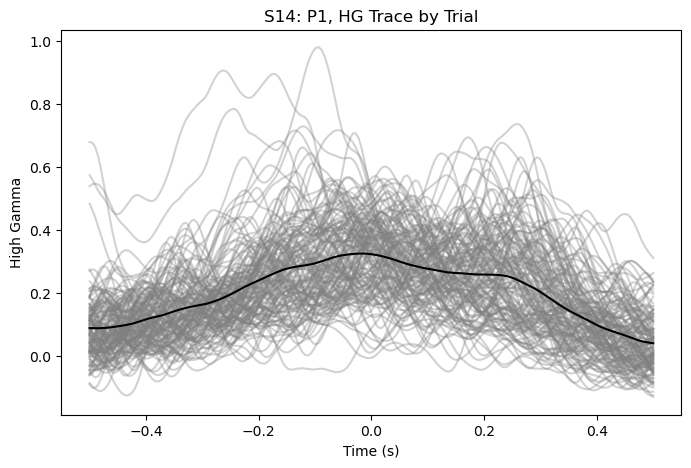

S26: 
[(148, 200, 111), (148,), (148, 3)]
[(144, 200, 111), (151, 200, 63), (46, 200, 149), (151, 200, 74)]


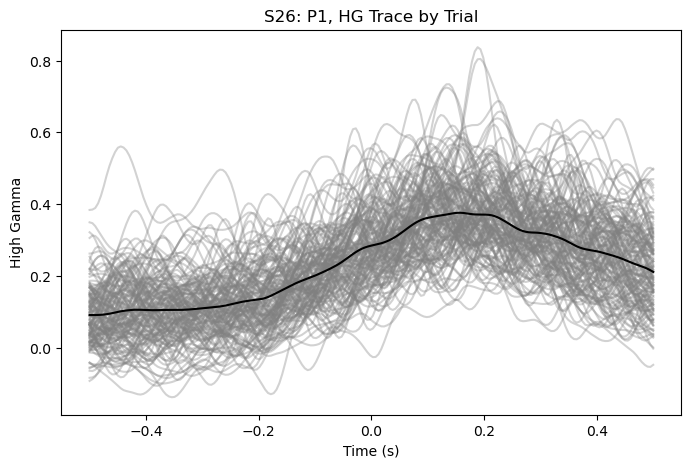

S23: 
[(151, 200, 63), (151,), (151, 3)]
[(144, 200, 111), (148, 200, 111), (46, 200, 149), (151, 200, 74)]


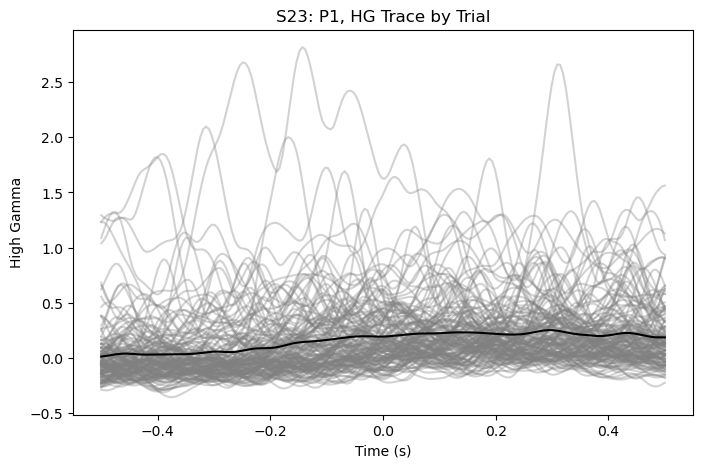

S33: 
[(46, 200, 149), (46,), (46, 3)]
[(144, 200, 111), (148, 200, 111), (151, 200, 63), (151, 200, 74)]


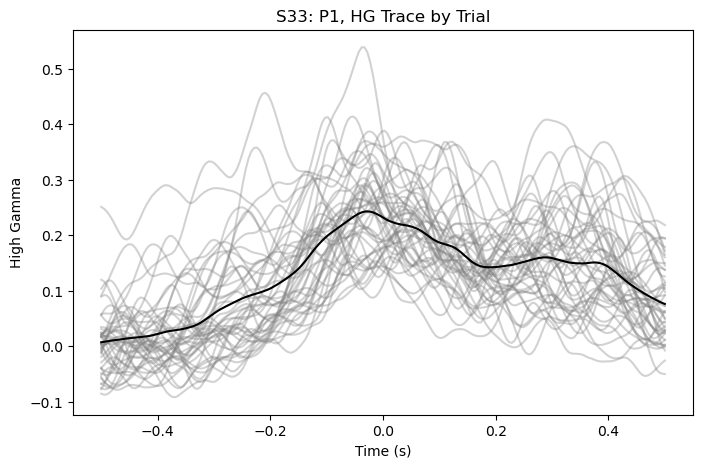

S22: 
[(151, 200, 74), (151,), (151, 3)]
[(144, 200, 111), (148, 200, 111), (151, 200, 63), (46, 200, 149)]


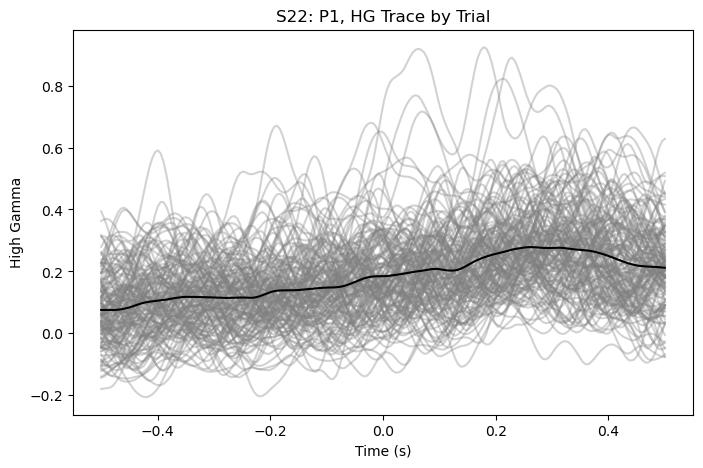

In [37]:
p_ind = 1
t = np.linspace(-0.5, 0.5, hg_data.shape[1])

for pt in pts:
    print(f'{pt}: ')
    pt_data, pre_data = utils.decoding_data_from_dict(pt_decoding_data, pt, p_ind, lab_type='phon', algn_type='phon_seq')
    print([d.shape for d in pt_data])
    print([p[0].shape for p in pre_data])

    hg_data = pt_data[0]
    plt.figure(figsize=(8,5))
    plt.plot(t, np.mean(hg_data, axis=2).T, 'grey', alpha=0.35)
    plt.plot(t, np.mean(np.mean(hg_data, axis=2), axis=0), 'black')
    plt.title(f'{pt}: P{p_ind}, HG Trace by Trial')
    plt.xlabel('Time (s)')
    plt.ylabel('High Gamma')
    plt.show()